## Further investigations on the CIFAR-10 dataset

Our final model reached $~85\%$ accuracy on the CIFAR-10 dataset with the following tricks:

- Sequential network architecture similar to VGG (repeated Conv2D + Conv2D + MaxPooling2D blocks)
- using Dropout layers
- using BatchNormalization layers
- using ImageDataGenerator modifications

In [2]:
from keras.regularizers import L2
from keras.optimizers import SGD, Adam, RMSprop, AdamW
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from keras.datasets import mnist, cifar10
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Activation, AveragePooling2D, Conv2D, Add 
from keras.layers import MaxPooling2D, Flatten, Reshape, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.utils import to_categorical, plot_model, set_random_seed

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

X_train = X_train / 255
X_test = X_test / 255

y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

print(X_train.shape, X_test.shape, y_train_encoded.shape, y_test_encoded.shape)


(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 10) (10000, 10)


## Batch normalization applied after Activation

In [3]:
checkpoint = ModelCheckpoint("best_model.keras", monitor="val_loss", mode="min", verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor="val_loss", patience=5, verbose=1, mode="min")

model = Sequential()

model.add(Input(shape=(32, 32, 3)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))


model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(10, activation="softmax"))

model.summary()

model.compile(loss="categorical_crossentropy",
              metrics=["accuracy"],
              optimizer=Adam()
              )

train = model.fit(X_train, y_train_encoded, 
         epochs=1,
         callbacks=[early_stop, checkpoint],
         batch_size=32,
         validation_split=0.1)

model.evaluate(X_test, y_test_encoded)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           51

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3829 - loss: 1.7603
Epoch 1: val_loss improved from inf to 1.06689, saving model to best_model.keras
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 35ms/step - accuracy: 0.3830 - loss: 1.7601 - val_accuracy: 0.6204 - val_loss: 1.0669
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6024 - loss: 1.1041


[1.110012412071228, 0.5990999937057495]

## Batch normalization applied before Activation - recommended order of layers

In [4]:
checkpoint = ModelCheckpoint("best_model.keras", monitor="val_loss", mode="min", verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor="val_loss", patience=5, verbose=1, mode="min", restore_best_weights=True)

model = Sequential()

model.add(Input(shape=(32, 32, 3)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation(activation="relu"))

model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation(activation="relu"))

model.add(MaxPooling2D(2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation(activation="relu"))

model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation(activation="relu"))

model.add(MaxPooling2D(2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation(activation="relu"))

model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation(activation="relu"))

model.add(MaxPooling2D(2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation(activation="relu"))

model.add(Dense(10, activation="softmax"))

model.summary()

model.compile(loss="categorical_crossentropy",
              metrics=["accuracy"],
              optimizer=Adam()
              )

train = model.fit(X_train, y_train_encoded, 
         epochs=1,
         callbacks=[early_stop, checkpoint],
         batch_size=32,
         validation_split=0.1)

model.evaluate(X_test, y_test_encoded)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4076 - loss: 1.6366
Epoch 1: val_loss improved from inf to 0.98269, saving model to best_model.keras
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 40ms/step - accuracy: 0.4077 - loss: 1.6365 - val_accuracy: 0.6584 - val_loss: 0.9827
Restoring model weights from the end of the best epoch: 1.
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6356 - loss: 1.0189


[1.026353120803833, 0.635699987411499]

## Residual networks

[K. He, X. Zhang, S. Ren, J. Sun - Deep Residual Learning for Image Recognition - 2015](https://arxiv.org/abs/1512.03385)

The main idea of residual networks is to use shortcuts to improve the training accuracy.
In a general model there is no guarantee that stacking new layers can even increase the training accuracy. By adding skip connections, we can ensure some kind of motononity using identity mappings. Without these, even an $F(x)=x$ identity function is hard to approximate with more layers.

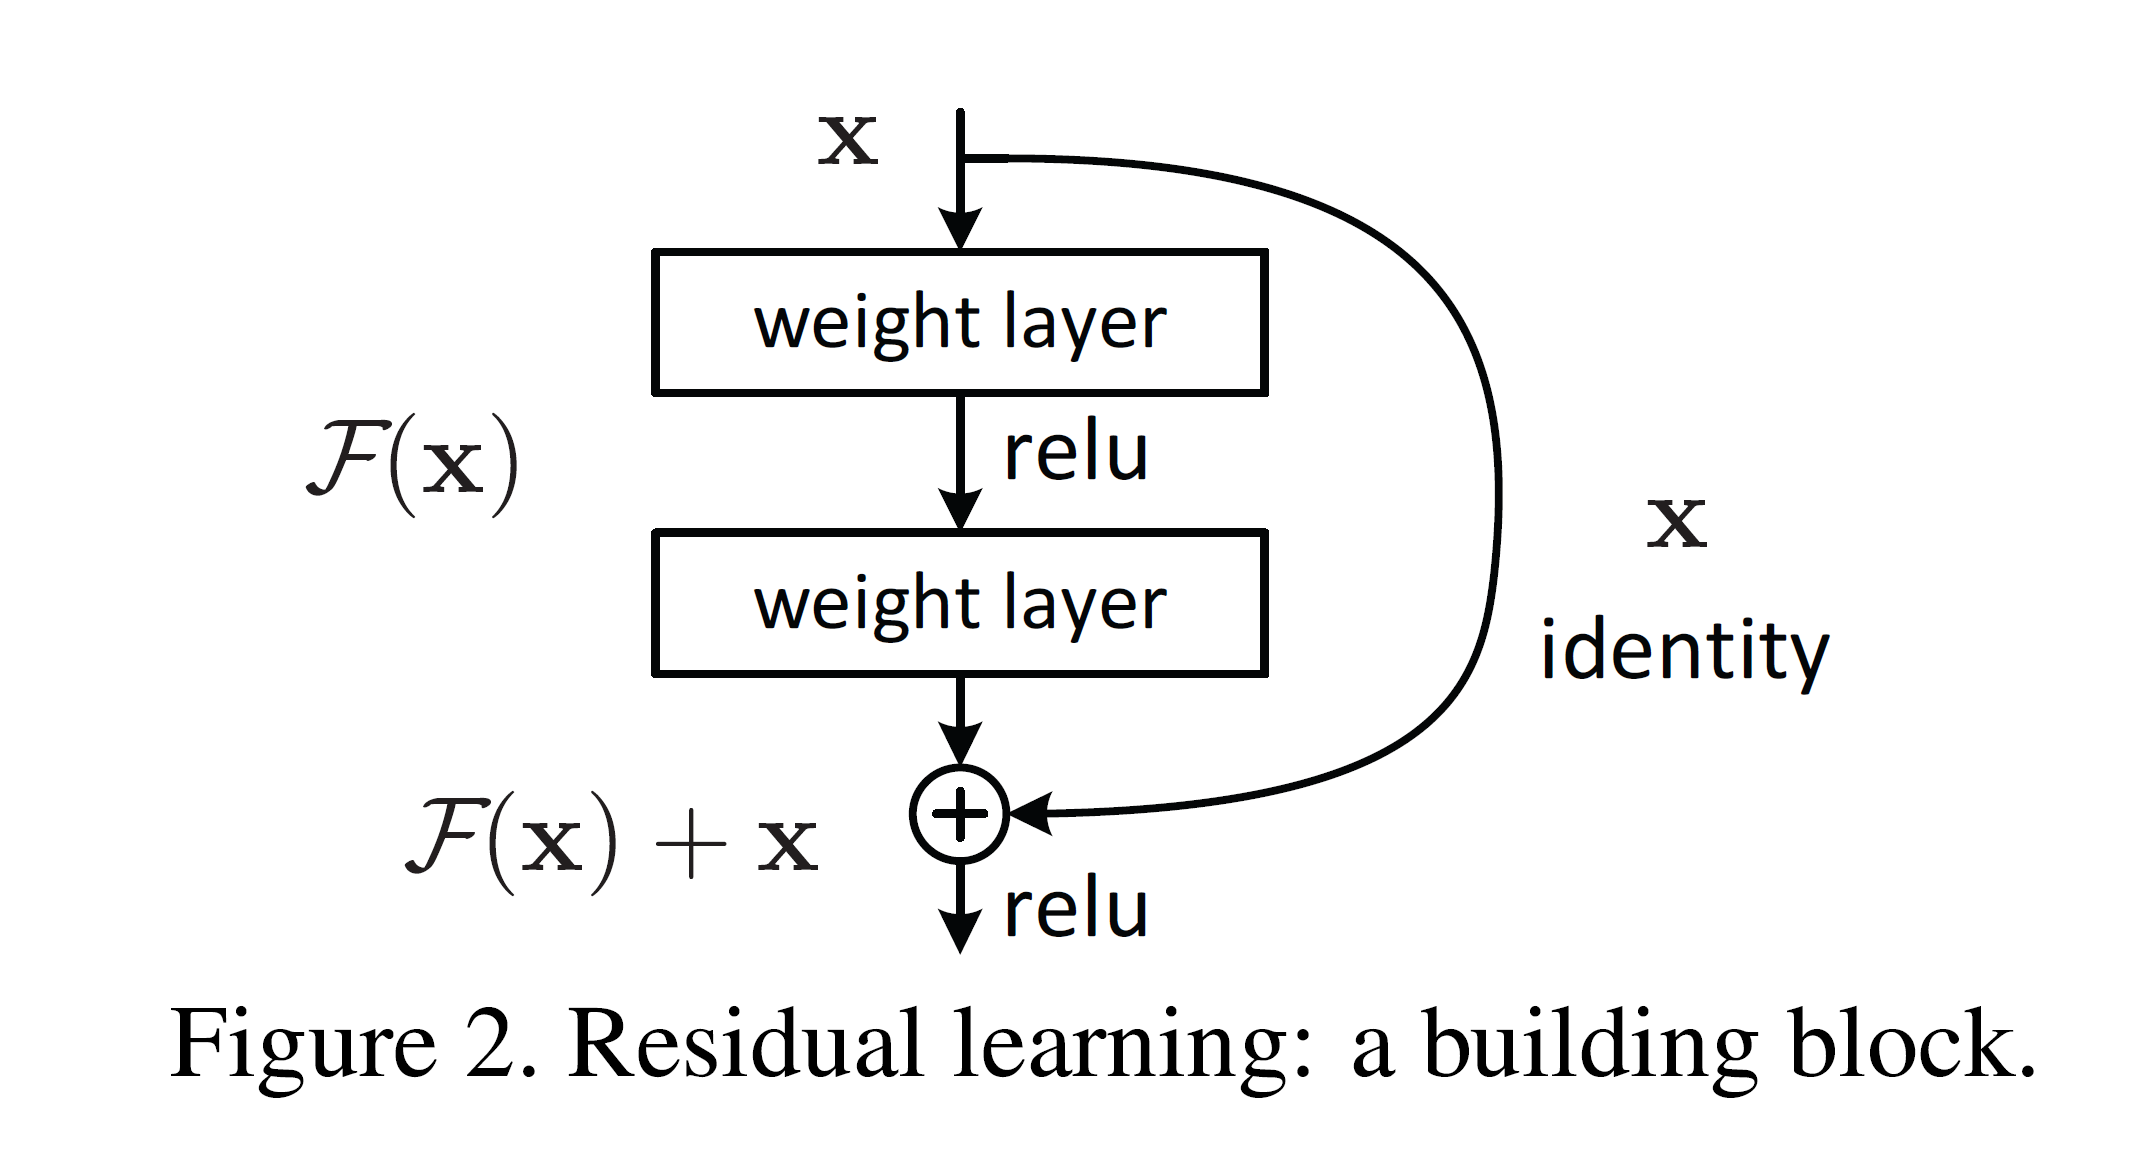

In [5]:
from IPython.display import Image
Image("resblock.png")
# Source: K. He, X. Zhang, S. Ren, J. Sun - Deep Residual Learning for Image Recognition - 2015
# https://arxiv.org/abs/1512.03385

## Functional model building in Keras

Let's build our VGG-style model with Functional model building in Keras

In [6]:
from keras.models import Model

inp = Input(shape=(32, 32, 3))

flat = Flatten()(inp) 

out = Dense(10, activation="relu")(flat)

model = Model(inputs=inp, outputs=out)

model.summary()

Model: "functional_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        30,730 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,730 (120.04 KB)

 Trainable params: 30,730 (120.04 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_54"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 32, 32,    │        448 │ input_layer_3[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 32, 32,    │      2,320 │ conv2d_12[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 16, 16,    │          0 │ conv2d_13[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 16, 16,    │          0 │ conv2d_12[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,768 (10.81 KB)

 Trainable params: 2,768 (10.81 KB)

 Non-trainable params: 0 (0.00 B)

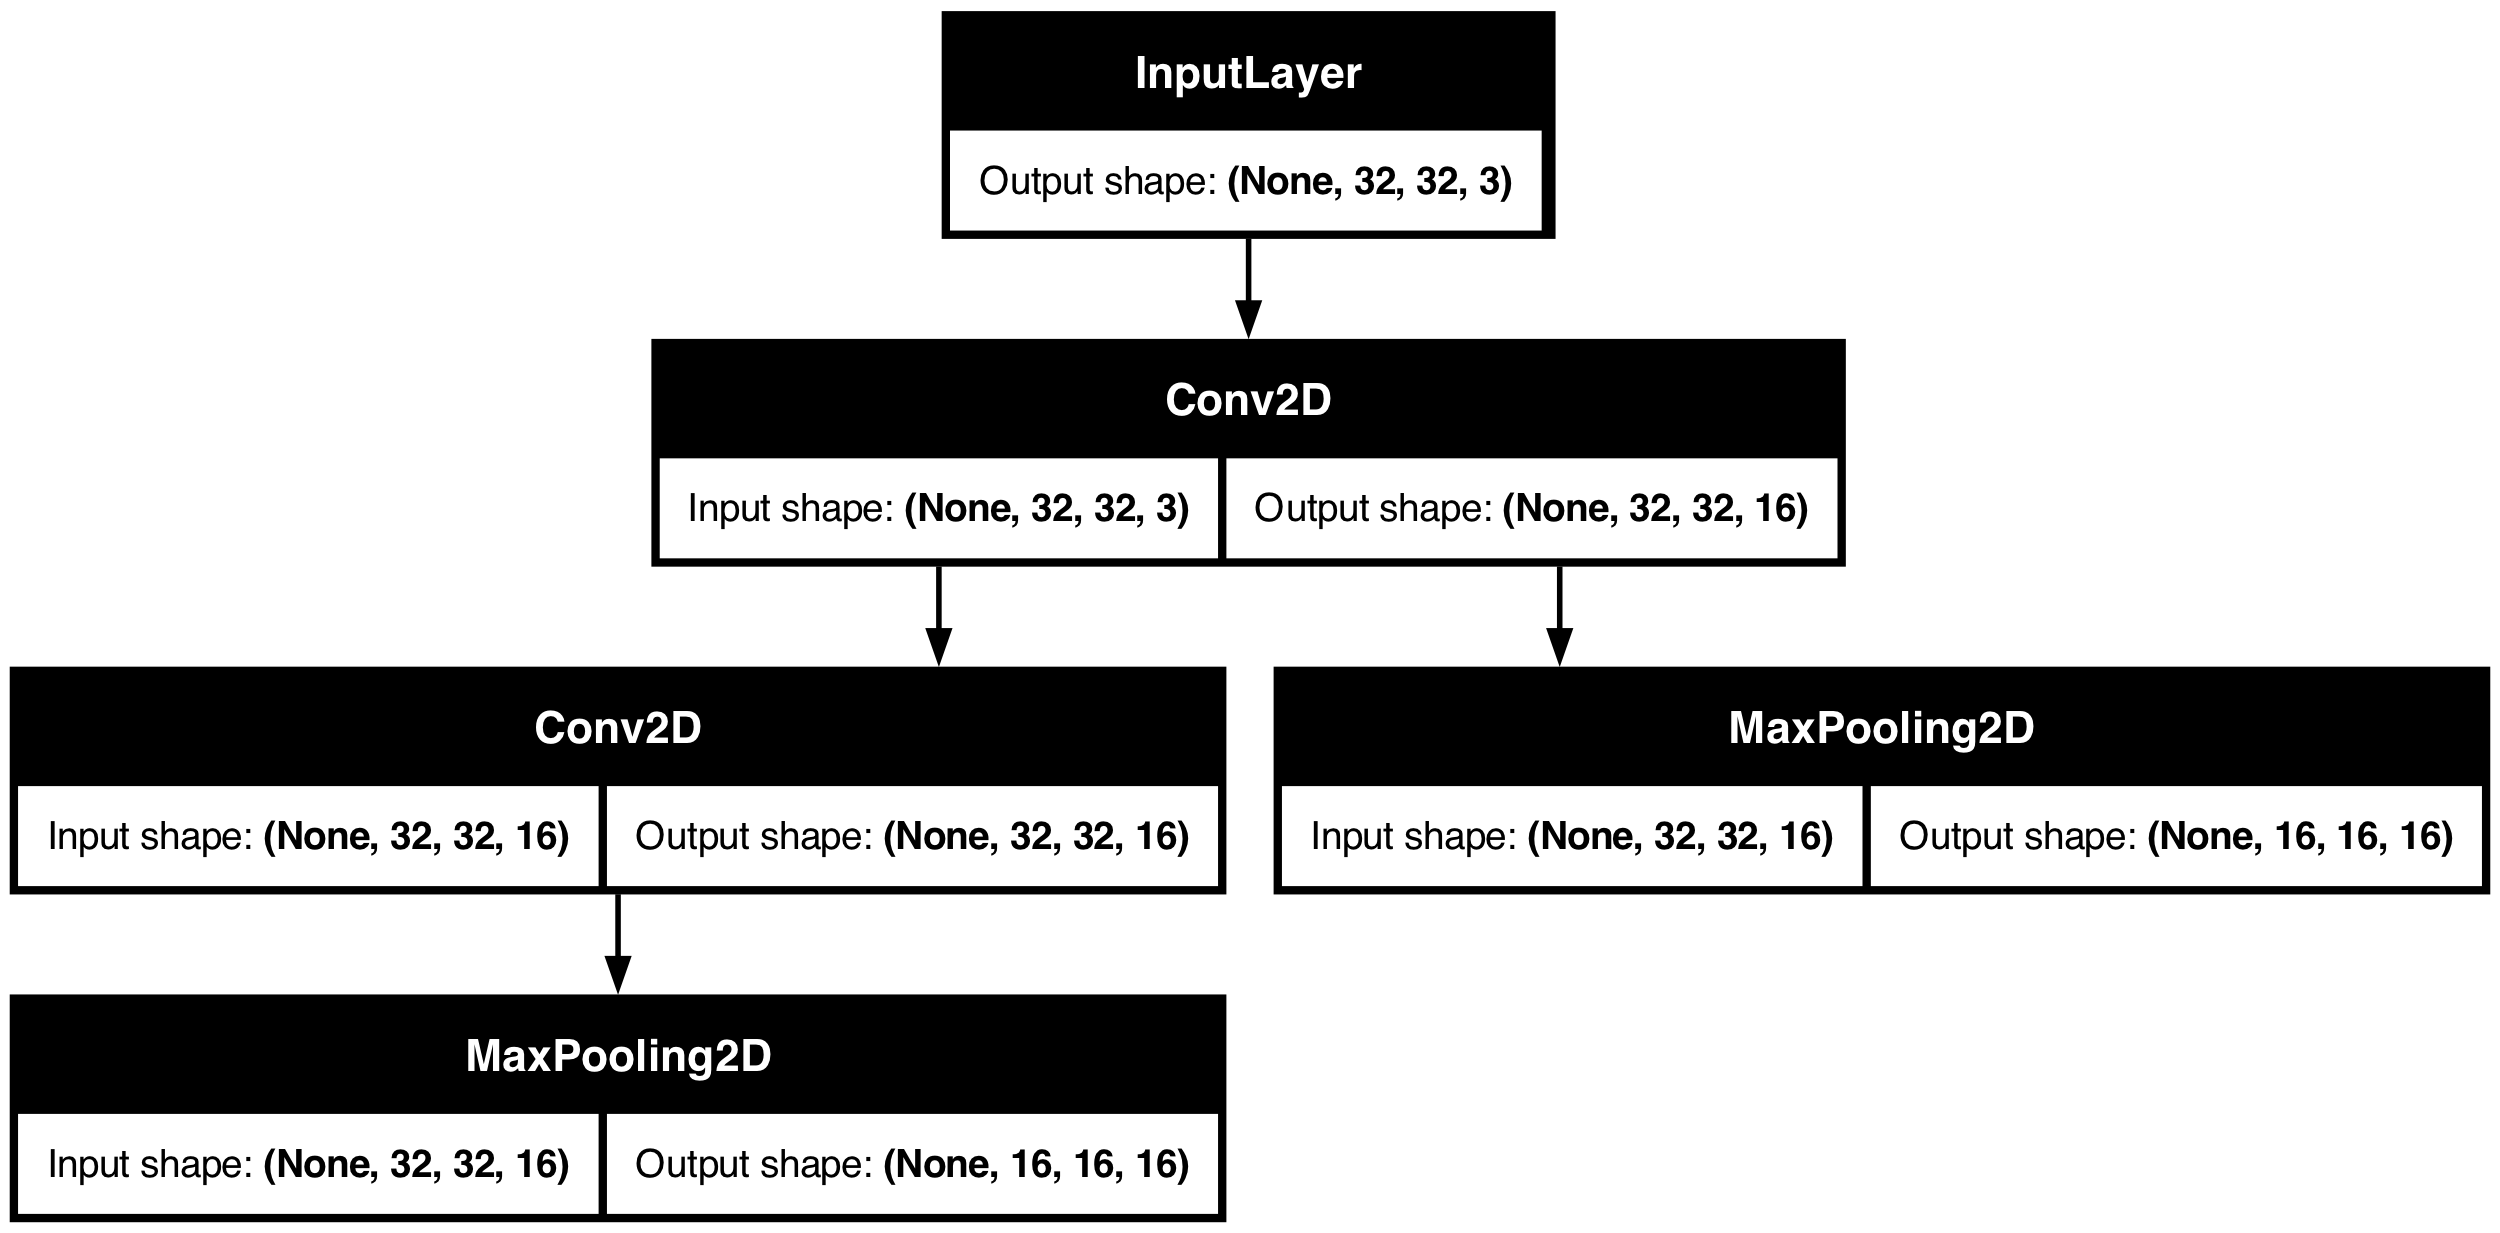

In [7]:
inp = Input(shape=(32, 32, 3))

conv1 = Conv2D(filters=16, kernel_size=(3, 3), activation="relu", padding="same")(inp)

conv2 = Conv2D(filters=16, kernel_size=(3, 3), activation="relu", padding="same")(conv1)

pool = MaxPooling2D(2)(conv2) 
pool_old = MaxPooling2D(2)(conv1) 

model = Model(inputs=inp, outputs=[pool, pool_old])

model.summary()

plot_model(model, show_shapes=True)


In [ ]:
from keras.layers import Add, Concatenate

inp = Input(shape=(32, 32, 3))

conv1 = Conv2D(filters=16, kernel_size=(3, 3), activation="relu", padding="same")(inp)

conv2 = Conv2D(filters=16, kernel_size=(3, 3), activation="relu", padding="same")(conv1)

pool = MaxPooling2D(2)(conv2) 
pool_old = MaxPooling2D(2)(conv1) 

added = Add()([pool, pool_old])
#added = Concatenate()([pool, pool_old])

model = Model(inputs=inp, outputs=added)

model.summary()

plot_model(model, show_shapes=True)

Model: "functional_55"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 32, 32,    │        448 │ input_layer_4[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_14[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 32, 32,    │      2,320 │ activation_7[0][… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_15[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_8        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 32, 32,    │      2,320 │ activation_8[0][… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_16[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │ activation_7[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 32, 32,    │          0 │ add[0][0]         │
│ (Activation)        │ 16)               │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,280 (20.62 KB)

 Trainable params: 5,184 (20.25 KB)

 Non-trainable params: 96 (384.00 B)

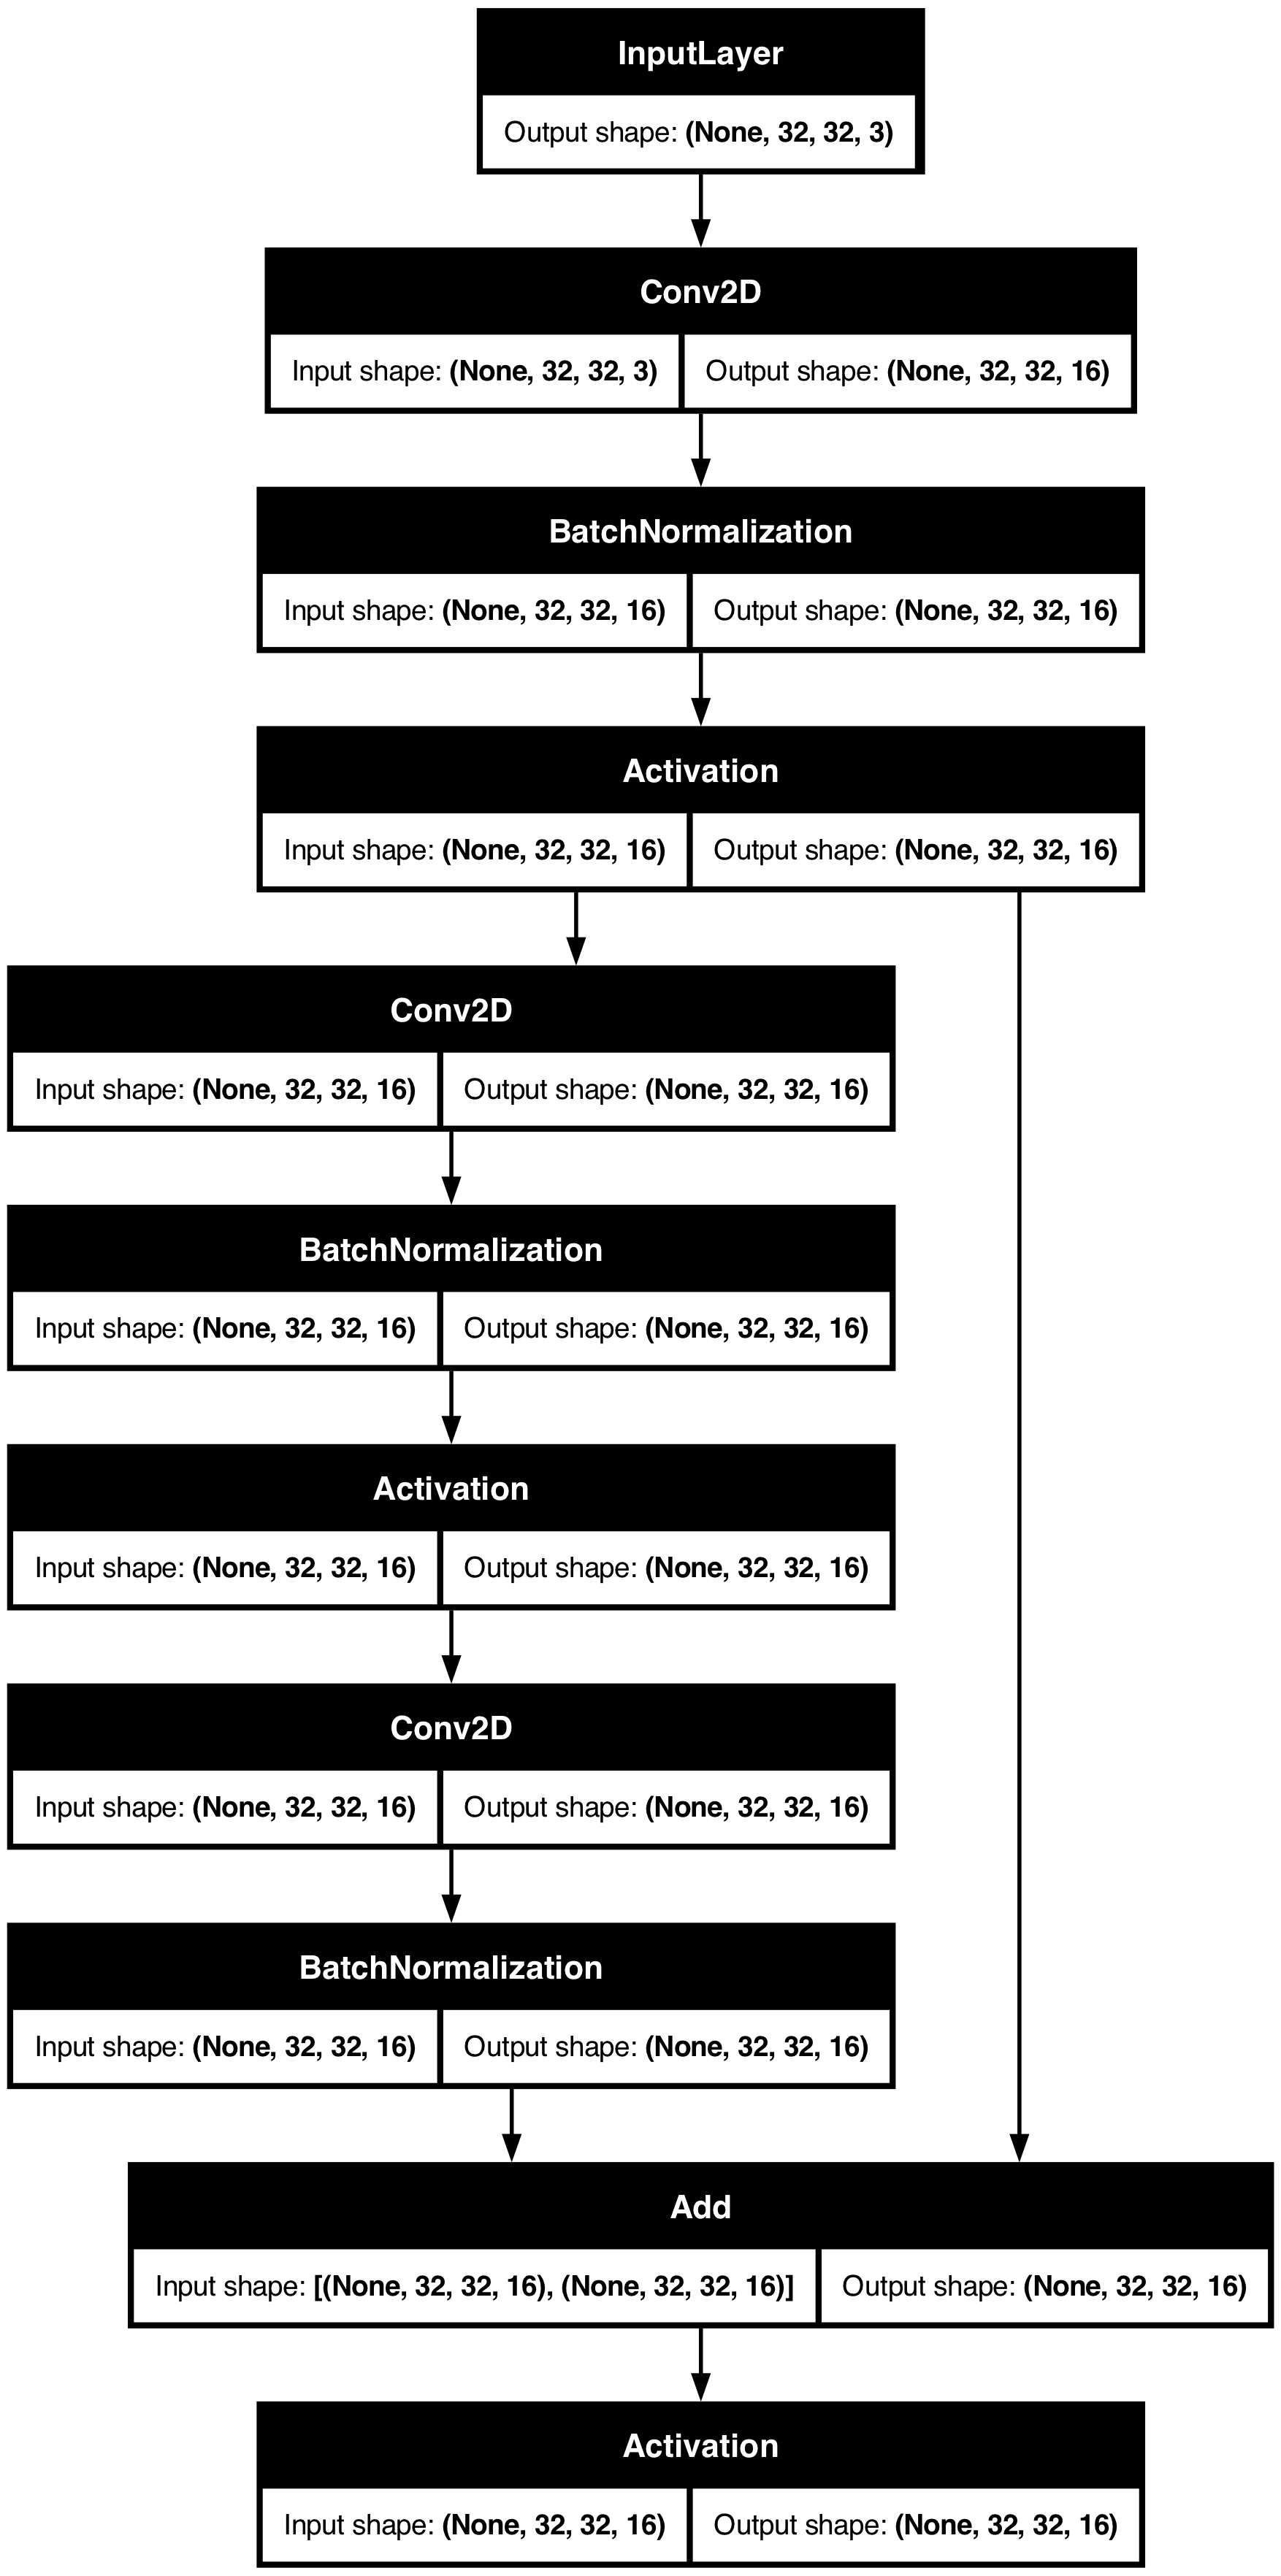

In [8]:
inp = Input(shape=(32, 32, 3))

conv1 = Conv2D(filters=16, kernel_size=(3, 3), padding="same")(inp)
bn1 = BatchNormalization()(conv1)
act_in = Activation(activation="relu")(bn1)

#################   Residual Block #1  #################

conv = Conv2D(filters=16, kernel_size=(3, 3), padding="same")(act_in)
bn = BatchNormalization()(conv)
act = Activation(activation="relu")(bn)

conv = Conv2D(filters=16, kernel_size=(3, 3), padding="same")(act)
bn = BatchNormalization()(conv)

added = Add()([bn, act_in])
act_out = Activation(activation="relu")(added)

#################  End of Residual Block #1  #################

model = Model(inputs=inp, outputs=act_out)

model.summary()
plot_model(model, show_shapes=True)

In [2]:
def resnet_regular_block(act_in):
    # shapes do not change during this block

    filters = act_in.shape[-1]
    
    conv = Conv2D(filters=filters, kernel_size=(3, 3), padding="same")(act_in)
    bn = BatchNormalization()(conv)
    act = Activation(activation="relu")(bn)
    
    conv = Conv2D(filters=filters, kernel_size=(3, 3), padding="same")(act)
    bn = BatchNormalization()(conv)
    
    added = Add()([bn, act_in])
    act_out = Activation(activation="relu")(added)

    return act_out

def resnet_halving_block(act_in):
    # shapes are halved during this block

    filters = 2 * act_in.shape[-1]  # double the filters
     
    conv = Conv2D(filters=filters, kernel_size=(3, 3), padding="same", strides=(2, 2))(act_in)
    bn = BatchNormalization()(conv)
    act = Activation(activation="relu")(bn)
    
    conv = Conv2D(filters=filters, kernel_size=(3, 3), padding="same")(act)
    bn = BatchNormalization()(conv)

    conv_right = Conv2D(filters=filters, kernel_size=(1, 1), padding="same", strides=(2, 2))(act_in)
    
    added = Add()([bn, conv_right])
    act_out = Activation(activation="relu")(added)

    return act_out

## Training a Residual network with EarlyStopping

In [3]:
early_stop = EarlyStopping(monitor="val_loss", patience=5, mode="min", verbose=1, restore_best_weights=True)

inp = Input(shape=(32, 32, 3))

conv1 = Conv2D(filters=16, kernel_size=(3, 3), padding="same")(inp)
bn1 = BatchNormalization()(conv1)
act_in = Activation(activation="relu")(bn1)

#################   Residual Block #1-3  #################

act_in = resnet_regular_block(act_in)
act_in = resnet_regular_block(act_in)
act_in = resnet_regular_block(act_in)

act_in = resnet_halving_block(act_in)  # reduce the spatial dimensions, double the filters

act_in = resnet_regular_block(act_in)
act_in = resnet_regular_block(act_in)

act_in = resnet_halving_block(act_in)  # reduce the spatial dimensions, double the filters

act_in = resnet_regular_block(act_in)
act_out = resnet_regular_block(act_in)

pool = GlobalAveragePooling2D()(act_out)
out = Dense(10, activation="softmax")(pool)

model = Model(inputs=inp, outputs=out)

#model.summary()
#plot_model(model, show_shapes=True)

model.compile(loss="categorical_crossentropy",
              metrics=["accuracy"],
              optimizer=Adam()
              )

train = model.fit(X_train, y_train_encoded, 
         epochs=1000,
         callbacks=[early_stop],
         batch_size=32,
         validation_split=0.1)

model.evaluate(X_test, y_test_encoded)

Epoch 1/1000


I0000 00:00:1728981623.457180     264 service.cc:145] XLA service 0x7e26100085d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728981623.457235     264 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1728981623.457240     264 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


   8/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.0945 - loss: 2.4978 

I0000 00:00:1728981632.805242     264 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 43s 16ms/step - accuracy: 0.4233 - loss: 1.5604 - val_accuracy: 0.4608 - val_loss: 1.7636
Epoch 2/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.6645 - loss: 0.9499 - val_accuracy: 0.5370 - val_loss: 1.5035
Epoch 3/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7369 - loss: 0.7527 - val_accuracy: 0.6814 - val_loss: 0.9595
Epoch 4/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7818 - loss: 0.6340 - val_accuracy: 0.6428 - val_loss: 1.1830
Epoch 5/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8094 - loss: 0.5506 - val_accuracy: 0.7386 - val_loss: 0.7822
Epoch 6/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8332 - loss: 0.4822 - val_accuracy: 0.7316 - val_loss: 0.8347
Epoch 7/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8574 - loss: 0.4112 - val_accuracy: 0.7720 - val_loss: 0.6994
Epoch 8/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.873

[0.718771755695343, 0.7802000045776367]

## Training a Residual network with EarlyStopping and ReduceLROnPlateau

In [5]:
from keras.callbacks import ReduceLROnPlateau

early_stop = EarlyStopping(monitor="val_loss", patience=7, mode="min", verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", patience=3, mode="min", verbose=1, factor=0.5)


inp = Input(shape=(32, 32, 3))

conv1 = Conv2D(filters=16, kernel_size=(3, 3), padding="same")(inp)
bn1 = BatchNormalization()(conv1)
act_in = Activation(activation="relu")(bn1)

#################   Residual Block #1-3  #################

act_in = resnet_regular_block(act_in)
act_in = resnet_regular_block(act_in)
act_in = resnet_regular_block(act_in)

act_in = resnet_halving_block(act_in)  # reduce the spatial dimensions, double the filters

act_in = resnet_regular_block(act_in)
act_in = resnet_regular_block(act_in)

act_in = resnet_halving_block(act_in)  # reduce the spatial dimensions, double the filters

act_in = resnet_regular_block(act_in)
act_out = resnet_regular_block(act_in)

pool = GlobalAveragePooling2D()(act_out)
out = Dense(10, activation="softmax")(pool)

model = Model(inputs=inp, outputs=out)

#model.summary()
#plot_model(model, show_shapes=True)

model.compile(loss="categorical_crossentropy",
              metrics=["accuracy"],
              optimizer=Adam()
              )

train = model.fit(X_train, y_train_encoded, 
         epochs=1000,
         callbacks=[early_stop, reduce_lr],
         batch_size=32,
         validation_split=0.1)

model.evaluate(X_test, y_test_encoded)

Epoch 1/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 37s 14ms/step - accuracy: 0.4141 - loss: 1.6023 - val_accuracy: 0.4330 - val_loss: 1.8700 - learning_rate: 0.0010
Epoch 2/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.6554 - loss: 0.9745 - val_accuracy: 0.6728 - val_loss: 0.9694 - learning_rate: 0.0010
Epoch 3/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7291 - loss: 0.7681 - val_accuracy: 0.7294 - val_loss: 0.8096 - learning_rate: 0.0010
Epoch 4/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7767 - loss: 0.6457 - val_accuracy: 0.7536 - val_loss: 0.7106 - learning_rate: 0.0010
Epoch 5/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8053 - loss: 0.5559 - val_accuracy: 0.7336 - val_loss: 0.7911 - learning_rate: 0.0010
Epoch 6/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8320 - loss: 0.4841 - val_accuracy: 0.7316 - val_loss: 0.7813 - learning_rate: 0.0010
Epoch 7/1000
1405/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/s

[0.6242486238479614, 0.8055999875068665]

### Apply weight initializaiton (`he_normal`) and kernel regularization (`L2`)

In [11]:
from keras.regularizers import l2

regularizer = l2(1e-3)

def resnet_regular_block(act_in):
    # shapes do not change during this block

    filters = act_in.shape[-1]
    
    conv = Conv2D(filters=filters, kernel_size=(3, 3), padding="same",
                 kernel_initializer='he_normal', kernel_regularizer=regularizer)(act_in)
    bn = BatchNormalization()(conv)
    act = Activation(activation="relu")(bn)
    
    conv = Conv2D(filters=filters, kernel_size=(3, 3), padding="same",
                 kernel_initializer='he_normal', kernel_regularizer=regularizer)(act)
    bn = BatchNormalization()(conv)
    
    added = Add()([bn, act_in])
    act_out = Activation(activation="relu")(added)

    return act_out

def resnet_halving_block(act_in):
    # shapes are halved during this block

    filters = 2 * act_in.shape[-1]  # double the filters
     
    conv = Conv2D(filters=filters, kernel_size=(3, 3), padding="same", strides=(2, 2),
                 kernel_initializer='he_normal', kernel_regularizer=regularizer)(act_in)
    bn = BatchNormalization()(conv)
    act = Activation(activation="relu")(bn)
    
    conv = Conv2D(filters=filters, kernel_size=(3, 3), padding="same",
                 kernel_initializer='he_normal', kernel_regularizer=regularizer)(act)
    bn = BatchNormalization()(conv)

    conv_right = Conv2D(filters=filters, kernel_size=(1, 1), padding="same", strides=(2, 2),
                       kernel_initializer='he_normal', kernel_regularizer=regularizer)(act_in)
    
    added = Add()([bn, conv_right])
    act_out = Activation(activation="relu")(added)

    return act_out

In [12]:
from keras.callbacks import ReduceLROnPlateau

early_stop = EarlyStopping(monitor="val_loss", patience=7, mode="min", verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", patience=3, mode="min", verbose=1, factor=0.5)


inp = Input(shape=(32, 32, 3))

conv1 = Conv2D(filters=16, kernel_size=(3, 3), padding="same")(inp)
bn1 = BatchNormalization()(conv1)
act_in = Activation(activation="relu")(bn1)

#################   Residual Block #1-3  #################

act_in = resnet_regular_block(act_in)
act_in = resnet_regular_block(act_in)
act_in = resnet_regular_block(act_in)

act_in = resnet_halving_block(act_in)  # reduce the spatial dimensions, double the filters

act_in = resnet_regular_block(act_in)
act_in = resnet_regular_block(act_in)

act_in = resnet_halving_block(act_in)  # reduce the spatial dimensions, double the filters

act_in = resnet_regular_block(act_in)
act_out = resnet_regular_block(act_in)

pool = GlobalAveragePooling2D()(act_out)
out = Dense(10, activation="softmax")(pool)

model = Model(inputs=inp, outputs=out)

#model.summary()
#plot_model(model, show_shapes=True)

model.compile(loss="categorical_crossentropy",
              metrics=["accuracy"],
              optimizer=Adam()
              )

train = model.fit(X_train, y_train_encoded, 
         epochs=1000,
         callbacks=[early_stop, reduce_lr],
         batch_size=32,
         validation_split=0.1)

model.evaluate(X_test, y_test_encoded)

Epoch 1/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.4064 - loss: 2.8197 - val_accuracy: 0.5680 - val_loss: 1.7876 - learning_rate: 0.0010
Epoch 2/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.6320 - loss: 1.5590 - val_accuracy: 0.5350 - val_loss: 1.8595 - learning_rate: 0.0010
Epoch 3/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.6898 - loss: 1.2799 - val_accuracy: 0.6056 - val_loss: 1.4847 - learning_rate: 0.0010
Epoch 4/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7325 - loss: 1.1236 - val_accuracy: 0.6198 - val_loss: 1.4840 - learning_rate: 0.0010
Epoch 5/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7553 - loss: 1.0343 - val_accuracy: 0.7346 - val_loss: 1.0836 - learning_rate: 0.0010
Epoch 6/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7676 - loss: 0.9795 - val_accuracy: 0.7006 - val_loss: 1.1652 - learning_rate: 0.0010
Epoch 7/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms

[0.8225879669189453, 0.8352000117301941]

## Per-pixel mean subtraction

- calculate the average pixel intensities across all the samples
- subtract the means in every pixel position

In [2]:
per_pixel_means = X_train.mean(axis=0)

X_train = X_train - per_pixel_means
X_test = X_test - per_pixel_means

In [20]:
from keras.callbacks import ReduceLROnPlateau

early_stop = EarlyStopping(monitor="val_loss", patience=7, mode="min", verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", patience=3, mode="min", verbose=1, factor=0.5)


inp = Input(shape=(32, 32, 3))

conv1 = Conv2D(filters=16, kernel_size=(3, 3), padding="same")(inp)
bn1 = BatchNormalization()(conv1)
act_in = Activation(activation="relu")(bn1)

#################   Residual Block #1-3  #################

act_in = resnet_regular_block(act_in)
act_in = resnet_regular_block(act_in)
act_in = resnet_regular_block(act_in)

act_in = resnet_halving_block(act_in)  # reduce the spatial dimensions, double the filters

act_in = resnet_regular_block(act_in)
act_in = resnet_regular_block(act_in)

act_in = resnet_halving_block(act_in)  # reduce the spatial dimensions, double the filters

act_in = resnet_regular_block(act_in)
act_out = resnet_regular_block(act_in)

pool = GlobalAveragePooling2D()(act_out)
out = Dense(10, activation="softmax")(pool)

model = Model(inputs=inp, outputs=out)

#model.summary()
#plot_model(model, show_shapes=True)

model.compile(loss="categorical_crossentropy",
              metrics=["accuracy"],
              optimizer=Adam()
              )

train = model.fit(X_train, y_train_encoded, 
         epochs=1000,
         callbacks=[early_stop, reduce_lr],
         batch_size=32,
         validation_split=0.1)

model.evaluate(X_test, y_test_encoded)

Epoch 1/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.4047 - loss: 2.7959 - val_accuracy: 0.4162 - val_loss: 2.1616 - learning_rate: 0.0010
Epoch 2/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.6249 - loss: 1.5844 - val_accuracy: 0.6868 - val_loss: 1.3186 - learning_rate: 0.0010
Epoch 3/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.6937 - loss: 1.2706 - val_accuracy: 0.6568 - val_loss: 1.3418 - learning_rate: 0.0010
Epoch 4/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7290 - loss: 1.1283 - val_accuracy: 0.6840 - val_loss: 1.2318 - learning_rate: 0.0010
Epoch 5/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7504 - loss: 1.0406 - val_accuracy: 0.7328 - val_loss: 1.0770 - learning_rate: 0.0010
Epoch 6/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7668 - loss: 0.9798 - val_accuracy: 0.6806 - val_loss: 1.2105 - learning_rate: 0.0010
Epoch 7/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms

[0.7810653448104858, 0.8360000252723694]

### Use Dropouts and change the monitored metric to val_accuracy

In [10]:
from keras.callbacks import ReduceLROnPlateau

from keras.regularizers import l2

regularizer = l2(0.0001)

def resnet_regular_block(act_in):
    # shapes do not change during this block

    filters = act_in.shape[-1]
    
    act_in = Dropout(0.2)(act_in)
    conv = Conv2D(filters=filters, kernel_size=(3, 3), padding="same",
                 kernel_initializer='he_normal', kernel_regularizer=regularizer)(act_in)
    bn = BatchNormalization()(conv)
    act = Activation(activation="relu")(bn)
    
    act = Dropout(0.2)(act)
    conv = Conv2D(filters=filters, kernel_size=(3, 3), padding="same",
                 kernel_initializer='he_normal', kernel_regularizer=regularizer)(act)
    bn = BatchNormalization()(conv)
    
    added = Add()([bn, act_in])
    act_out = Activation(activation="relu")(added)

    return act_out

def resnet_halving_block(act_in):
    # shapes are halved during this block

    filters = 2 * act_in.shape[-1]  # double the filters
    
    act_in = Dropout(0.2)(act_in)
    conv = Conv2D(filters=filters, kernel_size=(3, 3), padding="same", strides=(2, 2),
                 kernel_initializer='he_normal', kernel_regularizer=regularizer)(act_in)
    bn = BatchNormalization()(conv)
    act = Activation(activation="relu")(bn)
    
    act = Dropout(0.2)(act)

    conv = Conv2D(filters=filters, kernel_size=(3, 3), padding="same",
                 kernel_initializer='he_normal', kernel_regularizer=regularizer)(act)
    bn = BatchNormalization()(conv)

    conv_right = Conv2D(filters=filters, kernel_size=(1, 1), padding="same", strides=(2, 2),
                       kernel_initializer='he_normal', kernel_regularizer=regularizer)(act_in)
    
    added = Add()([bn, conv_right])
    act_out = Activation(activation="relu")(added)

    return act_out



early_stop = EarlyStopping(monitor="val_accuracy", patience=7, mode="max", verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_accuracy", patience=3, mode="max", verbose=1, factor=0.3)


inp = Input(shape=(32, 32, 3))

conv1 = Conv2D(filters=64, kernel_size=(3, 3), padding="same")(inp)
bn1 = BatchNormalization()(conv1)
act_in = Activation(activation="relu")(bn1)

#################   Residual Block #1-3  #################

act_in = resnet_regular_block(act_in)
act_in = resnet_regular_block(act_in)
act_in = resnet_regular_block(act_in)

act_in = resnet_halving_block(act_in)  # reduce the spatial dimensions, double the filters

act_in = resnet_regular_block(act_in)
act_in = resnet_regular_block(act_in)

act_in = resnet_halving_block(act_in)  # reduce the spatial dimensions, double the filters

act_in = resnet_regular_block(act_in)
act_out = resnet_regular_block(act_in)

pool = GlobalAveragePooling2D()(act_out)
pool = Dropout(0.2)(pool)
out = Dense(10, activation="softmax")(pool)

model = Model(inputs=inp, outputs=out)

#model.summary()
#plot_model(model, show_shapes=True)

model.compile(loss="categorical_crossentropy",
              metrics=["accuracy"],
              optimizer=Adam()
              )

train = model.fit(X_train, y_train_encoded, 
         epochs=1000,
         callbacks=[early_stop, reduce_lr],
         batch_size=32,
         validation_split=0.1)

model.evaluate(X_test, y_test_encoded)

Epoch 1/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 138s 64ms/step - accuracy: 0.3154 - loss: 2.6860 - val_accuracy: 0.4656 - val_loss: 2.0827 - learning_rate: 0.0010
Epoch 2/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 38ms/step - accuracy: 0.5645 - loss: 1.6958 - val_accuracy: 0.4062 - val_loss: 2.3534 - learning_rate: 0.0010
Epoch 3/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.6276 - loss: 1.4549 - val_accuracy: 0.6354 - val_loss: 1.4616 - learning_rate: 0.0010
Epoch 4/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.6768 - loss: 1.3066 - val_accuracy: 0.7224 - val_loss: 1.1983 - learning_rate: 0.0010
Epoch 5/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.7145 - loss: 1.2182 - val_accuracy: 0.7188 - val_loss: 1.2611 - learning_rate: 0.0010
Epoch 6/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.7330 - loss: 1.1593 - val_accuracy: 0.7350 - val_loss: 1.1729 - learning_rate: 0.0010
Epoch 7/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37m

[0.5002928376197815, 0.9111999869346619]